In [1]:
!pip install spotipy
!pip install pytorch_lightning
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import pandas as pd
import torch
from torch.utils.data import Dataset
import scipy.sparse as sp
import pandas as pd
import torch.nn.functional as F
import torch
torch.manual_seed(0)
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# TP3 : Spotify Recommendation System

As a future Deep Learning engineer, you will be asked to tackle some fundamental tasks. Recommendation Systems is one of these fundamental task. Obviously, you had a course introducing you to the world of recommendation. Hence, we will create a recommendation system based on Spotify Data. 

**The goal is to create a Playlist recommendation system.**


## Outline

Goal of this lab:
* Use an API
* **Read Documentation** 
* Create a functioning model
* Use Pytorch-Lightning
* See all the roles a Data Scientist can take

This lab is written to introduce you to a real-case application of RecSys



## Important : Set your Credentials 

Before beginning the lab make sure that you set your Spotify API Credentials correctly. If you don't have any credentials, please refer to TDm 1 and retrieve your keys.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="insertYours",
                                                           client_secret="insertYours"))

results = sp.search(q='weezer', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])



0 Island In The Sun
1 Buddy Holly
2 Say It Ain't So
3 Undone - The Sweater Song
4 Beverly Hills
5 Africa
6 Hash Pipe
7 I Just Threw Out The Love Of My Dreams
8 My Name Is Jonas
9 Pork And Beans
10 (If You're Wondering If I Want You To) I Want You To
11 All My Favorite Songs (feat. AJR)
12 Records
13 Enter Sandman
14 Burndt Jamb
15 Take on Me
16 Pink Triangle
17 Troublemaker
18 Say It Ain't So
19 Memories


# Introduction


You are working as a Data Scientist in FlexCorp, a startup that makes a Recommendation System. Obviously, as any flexible companies, an Intern was hired and did some stuff. And obviouly, there are loads of errors in it. Let's correct and give a better product.

You will be roaming around the different roles a Data Scientist can have in company. Your mission revolves around two things:
* Correct the existing works
* Fullfill the specification of the company

The company uses Pytorch-Lightning as their DL Framework

# I - Extract, Transform & Load : Being a Data Engineer and Data Analyst

Well, let's explore some data from Spotify. Obviously, we need some data. The intern did do some work on it. Let's check the usefulness and correct the errors.

* Code Review: Correct the intern's work


### A - Data Engineering : Retrieving and Cleaning Data 



---
Company's specification:
* Retrieve Data from 1960 to 2023 in a list.

---



In [4]:
# TODO : Correct the intern's code 

query_res = [sp.search(q='year:' + str(i), type='track', limit=50) for i in range(1960, 2023)]
tracks = []
for result in query_res:
    tracks += result['tracks']['items']
trackspd = pd.DataFrame(tracks)


In [5]:
print(trackspd.columns)
trackspd.head()

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'],
      dtype='object')


,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_group': 'album', 'album_type': 'album'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,False,At Last,76,https://p.scdn.co/mp3-preview/33a1d8d54f9a0588...,7,track,spotify:track:4Hhv2vrOTy89HFRcjU3QOx
1,"{'album_group': 'album', 'album_type': 'album'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,196133,False,{'isrc': 'USMC16046321'},{'spotify': 'https://open.spotify.com/track/0z...,https://api.spotify.com/v1/tracks/0zGLlXbHlrAy...,0zGLlXbHlrAyBN1x6sY0rb,False,A Sunday Kind Of Love,69,https://p.scdn.co/mp3-preview/d4b8fc3fc1eab63c...,4,track,spotify:track:0zGLlXbHlrAyBN1x6sY0rb
2,"{'album_group': 'album', 'album_type': 'album'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,187666,False,{'isrc': 'USMC16048489'},{'spotify': 'https://open.spotify.com/track/2I...,https://api.spotify.com/v1/tracks/2IdwQxhJn9ZE...,2IdwQxhJn9ZE4zIotcCefR,False,Stormy Weather,67,https://p.scdn.co/mp3-preview/615ab6d151b50c91...,9,track,spotify:track:2IdwQxhJn9ZE4zIotcCefR
3,"{'album_group': 'album', 'album_type': 'album'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,133933,False,{'isrc': 'USCA29801710'},{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4WUcNkpoNSKo...,4WUcNkpoNSKoe5MUuyzrfC,False,You're Nobody 'Til Somebody Loves You - Remast...,63,https://p.scdn.co/mp3-preview/ffe7fbc68d15bd85...,3,track,spotify:track:4WUcNkpoNSKoe5MUuyzrfC
4,"{'album_group': 'album', 'album_type': 'album'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,119360,False,{'isrc': 'USEM38800220'},{'spotify': 'https://open.spotify.com/track/3o...,https://api.spotify.com/v1/tracks/3oAWTk92mZBx...,3oAWTk92mZBxKBOKf8mR5v,False,Summertime Blues,64,https://p.scdn.co/mp3-preview/a8e11ef4a01644ac...,7,track,spotify:track:3oAWTk92mZBxKBOKf8mR5v



---
Company's specification:
* Retrieve the following keys is a dictionnary:
  * user_id
  * song_id
  * danceability
  * energy
  * speechiness
  * loudness
  * tempo

* Create a pandas dataframe

---

In [6]:
track = sp.audio_features(tracks[0]['id'])[0]
print(track['tempo'])
track.keys()
tracks[10].keys()

87.43


dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [12]:
# TODO : Extract relevant features from tracks
data = []
for i in range(len(tracks)):
    track = sp.audio_features(tracks[i]['id'])[0]
    # Hint : verify the existence of the keys in track[i]
    data.append({
        'user_id': 'user_{}'.format(i % 10),
        'song_id': tracks[i]['id'],
        'danceability': track['danceability'],
        'energy': track['energy'],
        'speechiness': track['speechiness'],
        'loudness': track['loudness'],
        'tempo': track['tempo']
    })

# TODO : Create a dataset
df = pd.DataFrame(data)

In [13]:
df.head()

,user_id,song_id,danceability,energy,speechiness,loudness,tempo
0,user_0,4Hhv2vrOTy89HFRcjU3QOx,0.274,0.348,0.0293,-8.631,87.430
1,user_1,0zGLlXbHlrAyBN1x6sY0rb,0.421,0.285,0.0293,-9.430,85.861
2,user_2,2IdwQxhJn9ZE4zIotcCefR,0.262,0.356,0.0303,-8.031,174.176
3,user_3,4WUcNkpoNSKoe5MUuyzrfC,0.503,0.182,0.0323,-16.651,63.684
4,user_4,3oAWTk92mZBxKBOKf8mR5v,0.714,0.886,0.0554,-8.629,156.351


* What do you think of the Intern's work ? Is he hireable ?

He is definitely not hireable because he did not use the API correctly. He did not retrieve the data from 1960 to 2023. He also did not retrieve the relevant features. He also did not create a dataset. He is not hireable.

## B - Data Analyst : Plotting Some Stuffs to Understand the Data





### Data : Speak to Me !

So we have a dataframe, but before training any models, we need to understand the data. 

Let's perform Exploratory Data Analysis
* Perform the Data Exploration

In [14]:
# TODO : Print your dataset
df[:20]

,user_id,song_id,danceability,energy,speechiness,loudness,tempo
0,user_0,4Hhv2vrOTy89HFRcjU3QOx,0.274,0.3480,0.0293,-8.631,87.430
1,user_1,0zGLlXbHlrAyBN1x6sY0rb,0.421,0.2850,0.0293,-9.430,85.861
2,user_2,2IdwQxhJn9ZE4zIotcCefR,0.262,0.3560,0.0303,-8.031,174.176
3,user_3,4WUcNkpoNSKoe5MUuyzrfC,0.503,0.1820,0.0323,-16.651,63.684
4,user_4,3oAWTk92mZBxKBOKf8mR5v,0.714,0.8860,0.0554,-8.629,156.351
5,user_5,121sjkub4p4zcFNozkKnQD,0.754,0.5400,0.0266,-8.326,101.738
6,user_6,5Z7bkW3dsu8jLdv3dEGxly,0.536,0.1480,0.0310,-14.903,109.295
7,user_7,6qMMQzYTKabamnMPlCmfxb,0.640,0.1540,0.0420,-14.050,126.045
8,user_8,2x6pbpjVGjiWCcH89IK8AX,0.743,0.7990,0.0375,-5.466,116.112
9,user_9,5Zu9mG353GB3p26t7M5AmR,0.486,0.3770,0.0309,-6.777,64.033


In [15]:
# TODO : What informations does this code gives you ?
df.describe()
#df.info()

,danceability,energy,speechiness,loudness,tempo
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,0.595333,0.627606,0.074137,-8.427883,120.976281
std,0.159459,0.212040,0.080036,3.902381,29.102079
min,0.000000,0.003420,0.000000,-36.612000,0.000000
25%,0.489000,0.480000,0.033000,-10.495000,98.626500
50%,0.599000,0.648000,0.042900,-7.720500,118.874000
75%,0.707750,0.798000,0.072875,-5.580500,138.121250
max,0.980000,0.996000,0.944000,-0.140000,211.270000


75% of the data have a value of danceability of 0.7 and below.

In [16]:
# TODO : Print the unique songs and users.
num_users = df.user_id.nunique()
num_songs = df.song_id.nunique()
print('Number of unique users:', num_users)
print('Number of unique songs:', num_songs)

Number of unique users: 10
Number of unique songs: 3150


In [17]:
# TODO : Is there any outliers in the DataFrame ? Check for nan values
print(df.isna().sum()) # 0 no NAN values*
#df.quantile(0.99) # on garde car ce ne sont pas considérés comme des valeurs abérrantes dans le contexte de cette étude.


user_id         0
song_id         0
danceability    0
energy          0
speechiness     0
loudness        0
tempo           0
dtype: int64


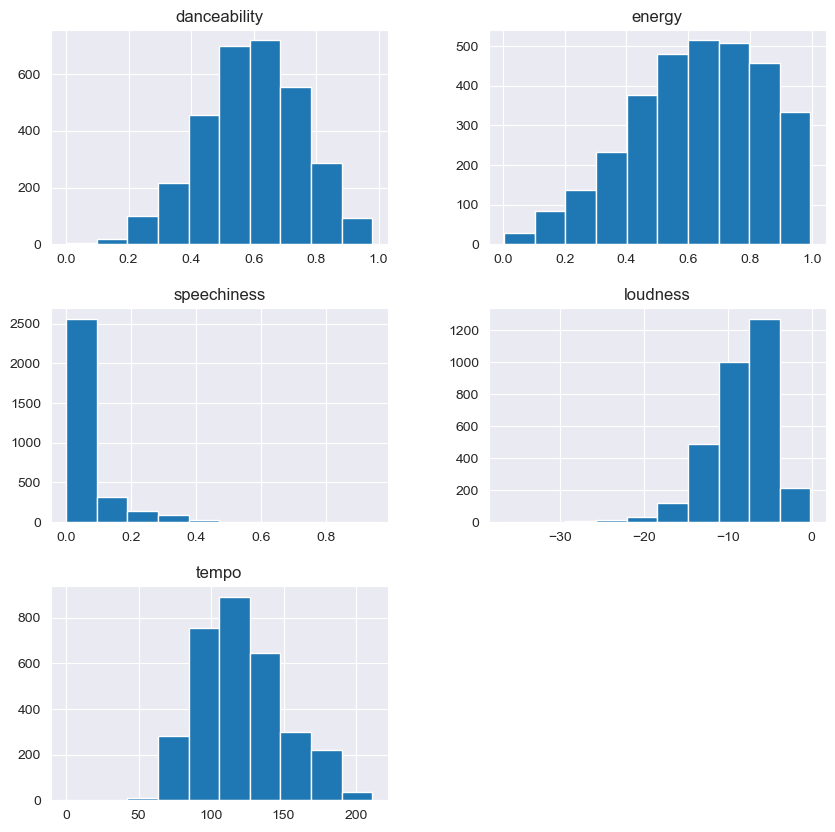

In [18]:
# TODO : Plot the distribution of each features. 
df.hist(figsize=(10,10))
plt.show()


In [19]:
corrMatrix = df.corr()

corrMatrix.danceability.sort_values(ascending=False)

C:\Users\Mon PC\AppData\Local\Temp\ipykernel_1584\911462397.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


danceability    1.000000
speechiness     0.218424
loudness        0.125033
energy          0.035882
tempo          -0.180371
Name: danceability, dtype: float64

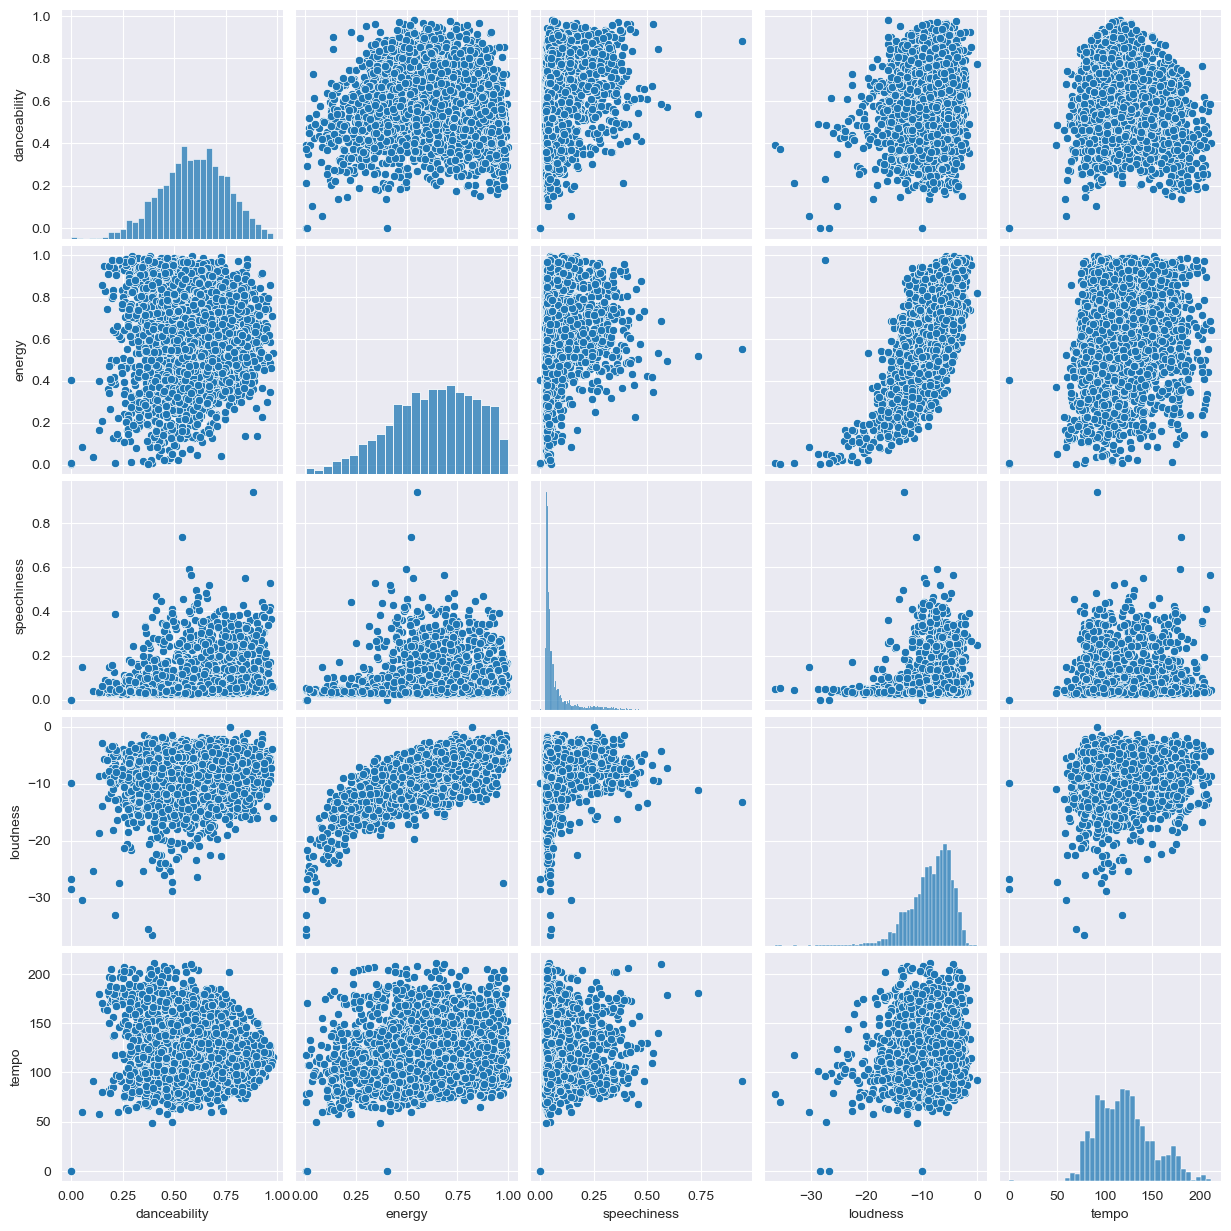

In [20]:
# TODO : Using Seaborn plot the pairwise distributions of each features.
sns.pairplot(df)
plt.show()


In [21]:
# TODO : Plot the top 10 songs features sorted by their 'danceability'. Hint : GroupBy is your friend.
top_songs = df[['song_id','danceability']].groupby(["song_id"]).mean().sort_values(by = "danceability",ascending=False)[:10]
print(top_songs)


                        danceability
song_id                             
11d9oUiwHuYt216EFA2tiz         0.980
0wbDgMuAoy7O7pL3a69uZx         0.975
5MPPttjfGap2C6j6eKcO6J         0.970
0O45fw2L5vsWpdsOdXwNAR         0.967
6jBCehpNMkwFVF3dz4nLIW         0.965
577YBGuskWkVDCxZrLRB4v         0.964
6vN77lE9LK6HP2DewaN6HZ         0.963
5m0yZ33oOy0yYBtdTXuxQe         0.962
7oLKoGzQVwjZ91AzCn560T         0.956
1pKYYY0dkg23sQQXi0Q5zN         0.956


In [22]:
# TODO : Plot the top 10 users feautures sorted by their danceab
top_users = df[['user_id','danceability']].groupby(["user_id"]).mean().sort_values(by = "danceability",ascending=False)[:10]
print(top_users)


         danceability
user_id              
user_2       0.609376
user_4       0.604130
user_5       0.597051
user_6       0.596794
user_7       0.594714
user_1       0.592835
user_3       0.591778
user_8       0.591337
user_9       0.591225
user_0       0.584086


Normally, we are supposed to have a lot more understanding of the Dataset now. But there are few issues that might come from the data as is.
* What further steps do we need on the dataset ?

### Creating a Rating

As seen before, there's no specific ratings here. We can create one based on the other features. But we need to preprocess a little bit the existing features.
* Do we need to perform preprocessing on each features ?
* What type of preprocessing do we need to perform on the selected features ?
* What should it change on the data ?
* Using MinMaxScale, do the needed preprocessing.

More documentation on :  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


MinManScaler is

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# TODO : Define the columns to normalize. Hint : It must be a list of strings
cols_to_normalize = ["danceability", "energy", "speechiness", "loudness", "tempo"]
# TODO : Rescale and Replace the values apres preprocessing.
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df.head()



,user_id,song_id,danceability,energy,speechiness,loudness,tempo
0,user_0,4Hhv2vrOTy89HFRcjU3QOx,0.279592,0.347156,0.031038,0.767191,0.413831
1,user_1,0zGLlXbHlrAyBN1x6sY0rb,0.429592,0.283685,0.031038,0.745284,0.406404
2,user_2,2IdwQxhJn9ZE4zIotcCefR,0.267347,0.355216,0.032097,0.783642,0.824424
3,user_3,4WUcNkpoNSKoe5MUuyzrfC,0.513265,0.179915,0.034216,0.547297,0.301434
4,user_4,3oAWTk92mZBxKBOKf8mR5v,0.728571,0.889178,0.058686,0.767246,0.740053


Now we can compute a rating based on other features. For the moment, we will just take in account 2 features for the computation of the rating value:   **Energy, Loudness**

* When computing the rating value, do we need to re-do some post-processing on it ?

  

In [25]:
# TODO : Create your ratings
df['rating'] = (df['energy'] + df['loudness'])/2


In [26]:
# TODO : Using .describe(), describe your new dataframe. What can you tell about the rating column ?
df.describe()

,danceability,energy,speechiness,loudness,tempo,rating
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,0.607482,0.628853,0.078535,0.772760,0.572615,0.700806
std,0.162713,0.213625,0.084784,0.106997,0.137748,0.150666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001567
25%,0.498980,0.480143,0.034958,0.716084,0.466827,0.606963
50%,0.611224,0.649399,0.045445,0.792156,0.562664,0.717759
75%,0.722194,0.800520,0.077198,0.850831,0.653767,0.817663
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.973289


In [27]:
# TODO : Calculate the mean rating for each user. Don't forget to groupby
user_ratings = df[['user_id','rating']].groupby(["user_id"]).mean()
user_ratings.head()
# TODO : Calculate the mean rating for each song
#song_ratings = df[['song_id','rating']].groupby(["song_id"]).mean()
#user_ratings.head()


,rating
user_id,
user_0,0.698874
user_1,0.699859
user_2,0.705163
user_3,0.699751
user_4,0.701384


### Data : Speak to the Computer !

We're nearly over with the Data Engineering stuff. But we need to change something crucial about the existing user/items values.

* What is the issue with the current form of the Song_id and User_id values ?
* As seen in class, what preprocessing do we need to do on these specific columns ?
* Do we need to create separate pre-processors to re-encode the user and song columns ? Why ?

In [28]:
# TODO : Print the user_id or song_id. What is the issue ?
df.song_id

0       4Hhv2vrOTy89HFRcjU3QOx
1       0zGLlXbHlrAyBN1x6sY0rb
2       2IdwQxhJn9ZE4zIotcCefR
3       4WUcNkpoNSKoe5MUuyzrfC
4       3oAWTk92mZBxKBOKf8mR5v
                 ...          
3145    4Dvkj6JhhA12EX05fT7y2e
3146    5Eax0qFko2dh7Rl2lYs3bx
3147    4k6Uh1HXdhtusDW5y8Gbvy
3148    2Hh3ETdQKrmSI3QS0hme7g
3149    2CSRrnOEELmhpq8iaAi9cd
Name: song_id, Length: 3150, dtype: object

The issue is that these are string values and not numerical values. We need to re-encode them to numerical values. IN fact, string values are suitable for machine learning models,

In [32]:
from sklearn.preprocessing import LabelEncoder

# TODO : Re-encode the user_id and song_id columns to the correct values.
encoder_user = LabelEncoder()
encoder_song = LabelEncoder()

df.user_id = encoder_user.fit_transform(df.user_id)
df.song_id = encoder_song.fit_transform(df.song_id)

df.song_id.head()

0    1735
1     404
2     962
3    1836
4    1563
Name: song_id, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       3150 non-null   int64  
 1   song_id       3150 non-null   int64  
 2   danceability  3150 non-null   float64
 3   energy        3150 non-null   float64
 4   speechiness   3150 non-null   float64
 5   loudness      3150 non-null   float64
 6   tempo         3150 non-null   float64
 7   rating        3150 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 197.0 KB


## C - Creating the PyTorch Dataset: Being a ML/DL Ops



#### Creating the PyTorch Dataset

That was a long ride. But we are ready to train our model now. But first, let's create a Pytorch Dataset Class that we can reuse.
The PlaylistDataset class takes as input:
* df : the dataframe you've been creating from the beginning
Now let's get into the details of this class : 


* Fill in the blanks

In [34]:
class PlaylistDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # TODO : Retrieve the row corresponding to idx from the dataframe
        row = self.df.iloc[idx]
        # TODO : Retrieve these values and convert them into torch.tensor. Hint : Really be careful on the type of everything..
        user = torch.tensor(row['user_id'],dtype=torch.int) # Example
        song = torch.tensor(row['song_id'],dtype=torch.int)
        danceability = torch.tensor(row['danceability'], dtype=torch.float)

        energy = torch.tensor(row['energy'],dtype=torch.float)
        speechiness = torch.tensor(row['speechiness'],dtype=torch.float)
        loudness = torch.tensor(row['energy'],dtype=torch.float)
        tempo = torch.tensor(row['energy'],dtype=torch.float)
        rating = torch.tensor(row['energy'],dtype=torch.float)


        return {
            'user': user,
            'song': song,
            'danceability': danceability,
            'energy': energy,
            'speechiness': speechiness,
            'loudness': loudness,
            'tempo': tempo,
            'rating': rating
        }


In [35]:
# TODO : Make sure that your Dataset returns what we want.
dataset = PlaylistDataset(df)
dataset.__getitem__(0)

C:\Users\Mon PC\AppData\Local\Temp\ipykernel_1584\4142924502.py:12: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  user = torch.tensor(row['user_id'],dtype=torch.int) # Example
C:\Users\Mon PC\AppData\Local\Temp\ipykernel_1584\4142924502.py:13: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  song = torch.tensor(row['song_id'],dtype=torch.int)


{'user': tensor(0, dtype=torch.int32),
 'song': tensor(1735, dtype=torch.int32),
 'danceability': tensor(0.2796),
 'energy': tensor(0.3472),
 'speechiness': tensor(0.0310),
 'loudness': tensor(0.3472),
 'tempo': tensor(0.3472),
 'rating': tensor(0.3472)}

#### Creating the PyTorch Lightning Datamodule

Obviously, we can still rewrite all the code we wrote each and every time to train a model but meh, it's too much work :)

Let's use Pytorch Lightning.

* The DataModule class is a simple wrapper that encompasses all your datasets and dataloaders under one class. However, we need some proper initialization.
We need to create the Training, Validation and Testing Dataloader for each data sets we have.

* Fill in the blanks

In [47]:
from sklearn.model_selection import train_test_split
class PlaylistDataModule(pl.LightningDataModule):
    def __init__(self, df, batch_size=32, val_ratio=0.3):
        super().__init__()
        self.df = df
        self.batch_size = batch_size
        self.val_ratio = val_ratio

    def prepare_data(self):
        # download or preprocess data here
        # self.df = PlaylistDataset(self.df)
        pass

    def setup(self, stage=None):
        if stage == 'fit' or stage is None:
            # TODO : Split dataset into train and val sets
            self.train_data, self.val_data = train_test_split(PlaylistDataset(self.df), test_size= 1-self.val_ratio)

        if stage == 'test' or stage is None:
            # use entire dataset for testing
            self.test_data = PlaylistDataset(self.df)

    def train_dataloader(self):
        # TODO : Init your train_loader
        train_loader = DataLoader(self.train_data, batch_size=self.batch_size, shuffle=True)
        return train_loader

    def val_dataloader(self):
        # TODO : Init your val_loader
        val_loader = DataLoader(self.val_data, batch_size=self.batch_size, shuffle=False)
        return val_loader

    def test_dataloader(self):
        # TODO : Init your test_loader
        test_loader = DataLoader(self.test_data, batch_size=self.batch_size, shuffle=False)
        return test_loader


In [ ]:
class PlaylistDataModule(pl.LightningDataModule):
    def __init__(self, df, batch_size=32, val_ratio=0.3):
        super().__init__()
        self.df = df
        self.batch_size = batch_size
        self.val_ratio = val_ratio

    def prepare_data(self):
        # download or preprocess data here
        # self.df = PlaylistDataset(self.df)
        pass

    def setup(self, stage=None):
        if stage == 'fit' or stage is None:
            # TODO : Split dataset into train and val sets
            train_len = int((1 - self.val_ratio) * len(self.df))
            val_len = len(self.df) - train_len
            self.train_data, self.val_data = random_split(PlaylistDataset(self.df), [train_len, val_len])

        if stage == 'test' or stage is None:
            # use entire dataset for testing
            self.test_data = PlaylistDataset(self.df)

    def train_dataloader(self):
        # TODO : Init your train_loader
        train_loader = DataLoader(self.train_data, batch_size=self.batch_size, shuffle=True)
        return train_loader

    def val_dataloader(self):
        # TODO : Init your val_loader
        val_loader = DataLoader(self.val_data, batch_size=self.batch_size, shuffle=False)
        return val_loader

    def test_dataloader(self):
        # TODO : Init your test_loader
        test_loader = DataLoader(self.test_data, batch_size=self.batch_size, shuffle=False)
        return test_loader


# II - Getting Back to the NCF with Lightning : Being a Data Scientist

As seen in class, we have plenty of models available to train a RecSys model. Let's use a model everyone uses: Neural Collaborative Filtering Model.

However, comparing it to the one presented in class, the present model is a little bit more complex version that will handle more features than the basic User/Items embedding layers of the NCF.
* What are the two mains parts of the NCF model ?
* What is the purpose of the nn.Embedding layer ?
* What are the differences between the Embedding Layers and the Linear Layers.
* What basic operation do we perform to keep the informations given by all the features with User Embedding and Item Embedding ?


In [37]:
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl

class NCF(pl.LightningModule):
    def __init__(self, num_users, num_songs, embed_dim=32, hidden_dim=64, used_features=2):
        super(NCF, self).__init__()

        # User embedding layer
        self.user_embed = nn.Embedding(num_users, embed_dim)
        # TODO : Define your Song embedding layer
        self.song_embed = nn.Embedding(num_songs, embed_dim)
        # TODO : Define your MLP layers. The first layer is given
        self.layer1 = nn.Linear(embed_dim*2+used_features, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim//2)
        self.layer3 = nn.Linear(hidden_dim//2, 1)

        # TODO : What's the purpose of this class attribute ?
        self.used_features = used_features

    def forward(self, user, song,  energy, loudness,danceability= None, speechiness= None ,  tempo= None):
        # TODO : Embed user and song
        user_embed = self.user_embed(user)
        song_embed = self.song_embed(song)

        # TODO : Perform the basic operation. Hint : Don't forget to unsqueeze some things if shapes doesn't fit..
        if self.used_features==2:
            x = torch.cat([user_embed, song_embed, energy.unsqueeze(1), loudness.unsqueeze(1)], dim=1)


        # TODO : Pass through MLP layers
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)

        # Output final prediction
        return x.view(-1)

    def training_step(self, batch, batch_idx):
        # TODO : Retrieve User, Song, Energy, Loudness, Rating from the input batch

        user = batch['user']
        song = batch['song']
        energy = batch['energy']
        loudness = batch['loudness']
        rating = batch['rating']
        # TODO : Forward pass
        output = self.forward(user,song,energy,loudness)
        # TODO : Compute your loss. Hint : Do we use a MSE, BCE, CE, Focal Loss ?.
        loss = F.mse_loss(output, rating)
        # Log training loss
        self.log('train_loss', loss)

    def test_step(self, batch, batch_idx):
        # TODO : Retrieve User, Song, Energy, Loudness, Rating from the input batch

        user = batch['user']
        song = batch['song']
        energy = batch['energy']
        loudness = batch['loudness']
        rating = batch['rating']
        # TODO : Forward pass
        output = self.forward(user,song,energy,loudness)
        # TODO : Compute your loss. Hint : Do we use a MSE, BCE, CE, Focal Loss ?.
        loss = F.mse_loss(output, rating)
        # Log training loss
        self.log('test_loss', loss)


        return loss

    def validation_step(self, batch, batch_idx):
        # TODO : What changes do we have to make from the training step ? Can we just copy paste stuff ?
        # TODO : Add what's needed.. You've done this at least 3 times now

        user = batch['user']
        song = batch['song']
        energy = batch['energy']
        loudness = batch['loudness']
        rating = batch['rating']
        # TODO : Forward pass
        output = self.forward(user,song,energy,loudness)
        # TODO : Compute your loss. Hint : Do we use a MSE, BCE, CE, Focal Loss ?.
        loss = F.mse_loss(output, rating)
        # Log training loss
        self.log('val_loss', loss)

        return loss


    def configure_optimizers(self):
        # TODO : Define your learning_rate
        optimizer = torch.optim.Adam(self.parameters(), lr= 0.5)
        return optimizer



### Instantiate the model

Now let's create an instance of the model and the datamodule.

In [50]:
# TODO : Initialize model
model = NCF(num_users,num_songs)

# TODO : Initialize datamodule
print(dataset)
datamodule = PlaylistDataModule(df)


### Trainer : The magic of Lightning

So we have the choice to either recreate the famous training, valid and testing loop, but meh..

Lightning comes with a Trainer class that handles all the training for your.
* By reading the documentation: https://lightning.ai/docs/pytorch/stable/common/trainer.html, initiate the attributes of the class.
* Train and test the model on the dataset.

In [52]:
# TODO : Initialize PyTorch Lightning Trainer
trainer = pl.Trainer(accelerator='gpu',
                     devices= -1,
                     max_epochs=100,
                     fast_dev_run=False)

# TODO : Train the models

datamodule.setup('fit') # TODO : Setup your datamodule to the training mode
###########
trainer.fit(model, datamodule) # TODO : TRAIN !!!!!!!!!!!!!!!!!!!!!!!!!!!!
###########
# Evaluate the model on the test set
datamodule.setup('test')
trainer.test(model, datamodule) # TODO : TEST !!!!!!!!!!!!!!!!!!!!!!!!!!!!


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Mon PC\AppData\Local\Temp\ipykernel_1584\4142924502.py:12: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  user = torch.tensor(row['user_id'],dtype=torch.int) # Example
C:\Users\Mon PC\AppData\Local\Temp\ipykernel_1584\4142924502.py:13: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  song = torch.tensor(row['song_id'],dtype=torch.int)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type      | Params
-----------------------------------------
0 | user_embed | Embedding | 320   
1 | song_embed | Embedding | 100 K 
2 | layer1     | Linear    | 4.3 K 
3 |

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

### Monitoring the Training

Obviously, we have tools that allows us to monitor the training of our model. 
* Initiate a Tensorboard and watch your training.

If you have issues showing the Tensorboard UX, you're cookies might not allow it. So try to activate them.

In [48]:
%reload_ext tensorboard
%tensorboard --logdir 'lightning_logs/version_0'

Launching TensorBoard...

### Test the predictions

* Create a Playlist for user 1 based on the ratings your model predicted. You can obviously retrieve the top10 songs. But how ? :)

* The playlist should return the name of the song and its rating

In [ ]:
def predict(model, user_id, song_ids):
    ratings = ...            
    return ratings.numpy()

# TODO : Retrieve the TOP10 songs for user 1.

# III - Doing Some Feature Engineering : The Complete Package (Optional)

As you might have seen, we only kept two features (Energy, Loudness) to compute the final Rating . But, we can use much more than that. As we have remaining features (Danceability..), we can add them to our rating computation, and explain their contribution on the prediction of our model.
* Explain the impact of the other features on the training of the model.
* Train (multiple?) models to validate your hypothesis.
